### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df=pd.read_csv("Black_Friday_Train.csv")

In [3]:
train_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
train_df.shape

(550068, 12)

In [6]:
test_df=pd.read_csv("Black_Friday_Test.csv")

In [7]:
test_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
test_df.shape

(233599, 11)

In [9]:
df= train_df.append(test_df)

In [10]:
df.shape

(783667, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [12]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(["User_ID"],axis=1,inplace=True)

In [15]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Feature Engineering

In [16]:
#df_Gender=pd.get_dummies(df["Gender"],drop_first=1)

In [17]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
df["Age"]=df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
df_city=pd.get_dummies(df["City_Category"],drop_first=True)

In [22]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [23]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [24]:
df.drop("City_Category",axis=1,inplace=True)

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [27]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [28]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [29]:
mode1=df["Product_Category_2"].mode()[0]
mode1

8.0

In [30]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(mode1)

In [31]:
df["Product_Category_2"].head(5)

0     8.0
1     6.0
2     8.0
3    14.0
4     8.0
Name: Product_Category_2, dtype: float64

In [32]:
mode2= df["Product_Category_3"].mode()[0]
mode2

16.0

In [33]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(mode2)

In [34]:
df["Product_Category_3"].head(5)

0    16.0
1    14.0
2    16.0
3    16.0
4    16.0
Name: Product_Category_3, dtype: float64

In [35]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [37]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+",'')

C:\Users\2002m\AppData\Local\Temp/ipykernel_25580/4187808448.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+",'')


In [38]:
df["Stay_In_Current_City_Years"].head(5)

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [40]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

In [41]:
df["Stay_In_Current_City_Years"].dtype

dtype('int32')

In [42]:
df["B"]=df["B"].astype(int)
df["C"]=df["C"].astype(int)

In [43]:
df["B"].dtype

dtype('int32')

In [44]:
df["C"].dtype

dtype('int32')

In [45]:
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


### Data Visualization

##### Age vs Purchase

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

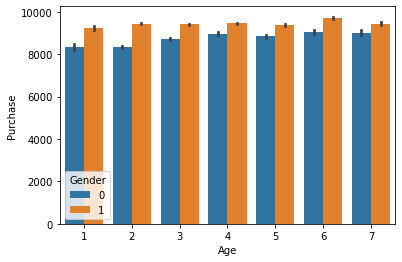

In [46]:
#sns.barplot("Age","Purchase",hue="Gender",data=df)
sns.barplot(x=df["Age"],y=df["Purchase"],hue=df["Gender"])

Observation :

Purchasing of men is high then women.

##### Purchase vs Occupation

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

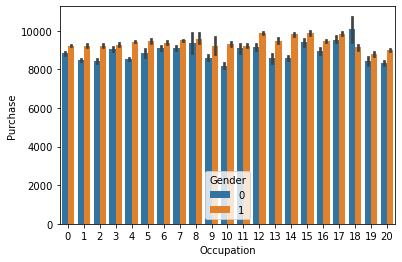

In [47]:
sns.barplot(y=df["Purchase"],x=df["Occupation"],hue=df["Gender"])

##### Purchase vs Product_Category_1

In [48]:
#sns.barplot("Purchase","Product_Category_1",hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

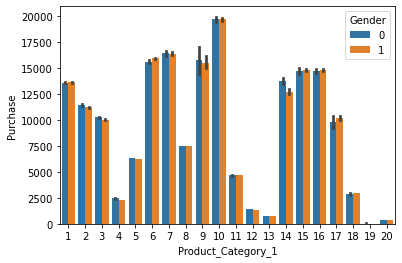

In [49]:
sns.barplot(y=df["Purchase"],x=df["Product_Category_1"],hue=df["Gender"])

##### Purchase vs Product_Category_2

In [50]:
#sns.barplot("Purchase","Product_Category_2",hue="Gender",data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

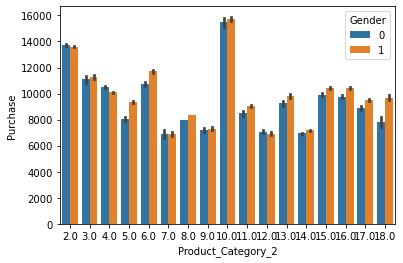

In [51]:
sns.barplot(y=df["Purchase"],x=df["Product_Category_2"],hue=df["Gender"])

##### Purchase vs Product_Category_3

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

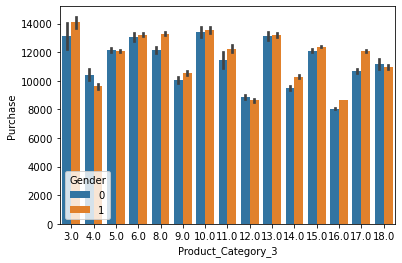

In [52]:
sns.barplot(y=df["Purchase"],x=df["Product_Category_3"],hue=df["Gender"])

### Feature Scaling

In [53]:
test_data=df[df["Purchase"].isnull()]

In [54]:
test_data.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [55]:
train_data=df[~df["Purchase"].isnull()]

In [56]:
train_data.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [57]:
train_data.shape

(550068, 12)

In [58]:
test_data.shape

(233599, 12)

In [59]:
df.shape

(783667, 12)

In [60]:
x=train_data.drop('Purchase',axis=1)

In [61]:
x.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [62]:
x.shape

(550068, 11)

In [63]:
y=train_data["Purchase"]

In [64]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [65]:
y.shape

(550068,)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40)

In [67]:
x_train.drop("Product_ID",axis=1,inplace=True)

C:\Users\2002m\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
x_test.drop("Product_ID",axis=1,inplace=True)

In [69]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

<AxesSubplot:>

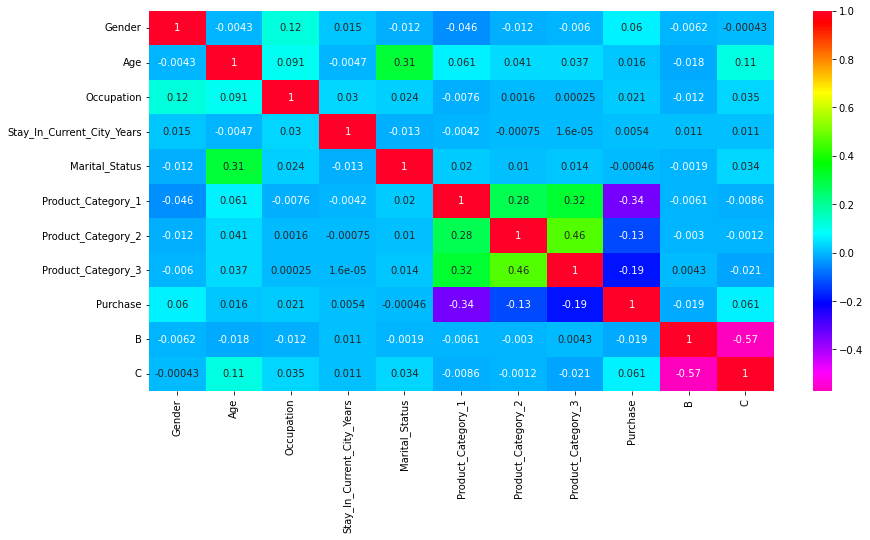

In [70]:
corr = train_data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='gist_rainbow_r')

In [71]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [72]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train,y_train)
predicted= regressor.predict(x_test)

In [73]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test,predicted))

In [74]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
predicted= regressor.predict(x_test)

In [75]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [76]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
predicted= regressor.predict(x_test)

In [77]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))   

In [78]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(x_train,y_train)
predicted = regressor.predict(x_test)

In [79]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [80]:
comparison_list=pd.DataFrame(list(zip(Algorithm,MSE_Score,R2_Score)),columns=["Algorithm","MSE_Score","R2_Score"])
comparison_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.195864e+07,0.130816
1,DecisionTreeRegressor,1.113159e+07,0.559381
2,RandomForestRegressor,9.302553e+06,0.631779
3,XGB Regressor,8.304811e+06,0.671272
